In [1]:
import pandas as pd 
import numpy as np

# Make a synthetic time series to explian the difference beteen 
# correlation and autocorrelation

# Break up sales: base sales & Sales due to a recuring promotion 
sales = pd.DataFrame({'Month': range(180), 'Base': 0, 'Promotion': 0})
sales = sales.set_index('Month')
sales.head()

,Base,Promotion
Month,,
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


<Axes: xlabel='Month'>

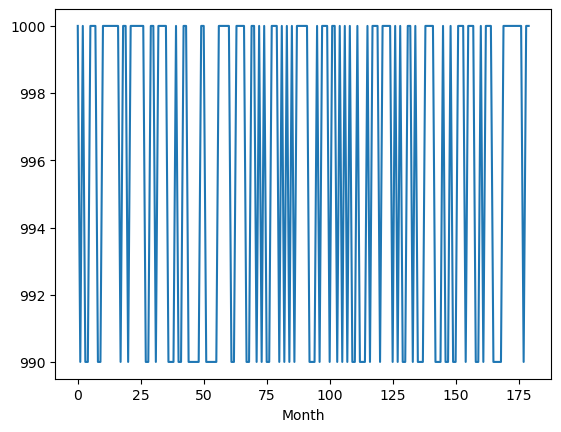

In [2]:
# Each month, around 1000 unites are sold, five or take some random 
# fluctuations
# We will start with a 1000 then add some random number to simulate fluctuations
noise = 10*np.random.randint(-1, 1, sales.shape[0]) # add fluctuations of [-2, 0, 2]
sales['base'] = 1000 + noise
sales.base.plot()

<Axes: xlabel='Month'>

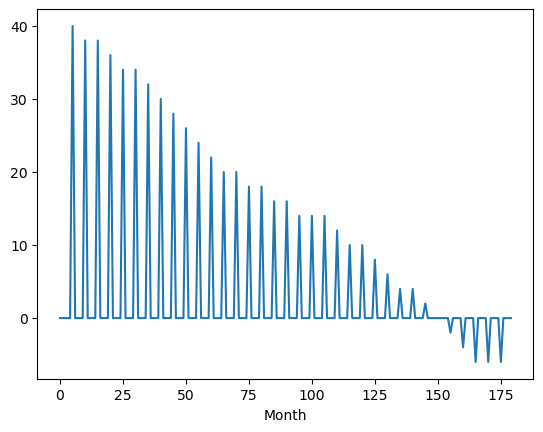

In [3]:
# The promotion is running every 5 months, starting with the sixth month
# Lets also assume that we can determine which sales are caused by the promotion 
# Lets say the first time we ran the promotion, it caused 40 sales 
sales.loc[5, 'Promotion'] = 40 # Sixth month has an index of 5

for i in range(10, 180, 5): # skip counting by 5: 10, 15, 20, ..., 175
    # the number of promotional sales is related to how well the promotion did in the past five month (with some random noise)
    # More precicely, the promotional sales during month `i` will be benchmarked off of 
    # the promotinal sales during the month `i-5`. we will ass noise as well 
    noise = 2*np.random.randint(-1, 1) # add fluctuations of [-2, 0, 2] 
    sales.loc[i, 'Promotion'] = sales.loc[i-5, 'Promotion'] + noise

sales.Promotion.plot()

<Axes: xlabel='Month'>

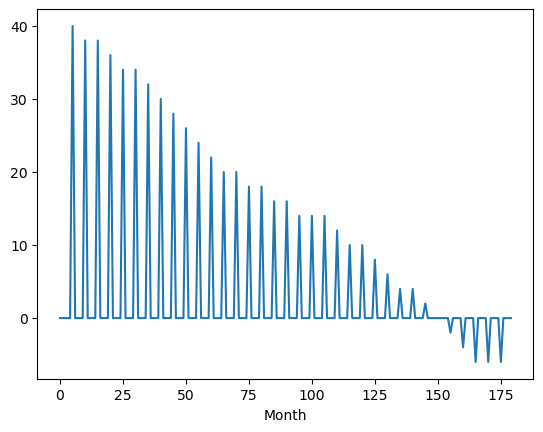

In [4]:
# Lets create a Total sales column that combines base and promotional sales together 

sales['Total'] = sales.Base + sales.Promotion

sales.Total.plot()

## Autocorrelation vs Partial Autocorrelation

- Autocorrelation function plot: 
    - shows that the series is correlated with its five lag itself, it's ten, lagged self, etc. Note that the correlations at the lags, 5,10,15,20 are fairly flat. This tells the story that sales from five months ago give us insight into our sales today, which is correct. It also tells us that sales from ten months ago give us insight into our sales today, which is also correct. What's missing from this picture is the idea that sales from 10 months ago or even 15 months ago give us insight into our present day sales, only because they give us insight into sales from five months ago. In other words, we don't really need the 10 month, 15 month or 20 month lagged data to forecast. But the auto-correlation function plot doesn't tell us this.
- Partial autocorrelation function plot: 
  - only includes the direct effect that a former month has on the current month.

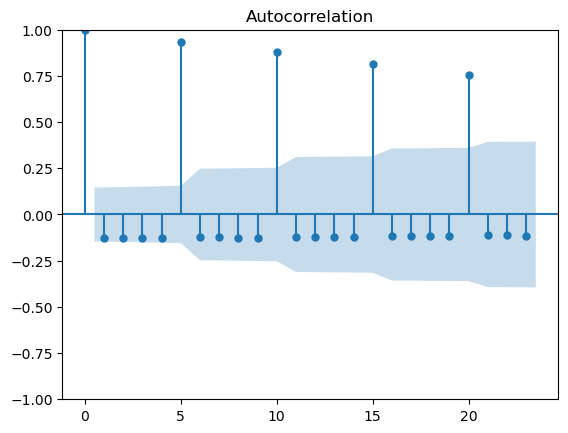

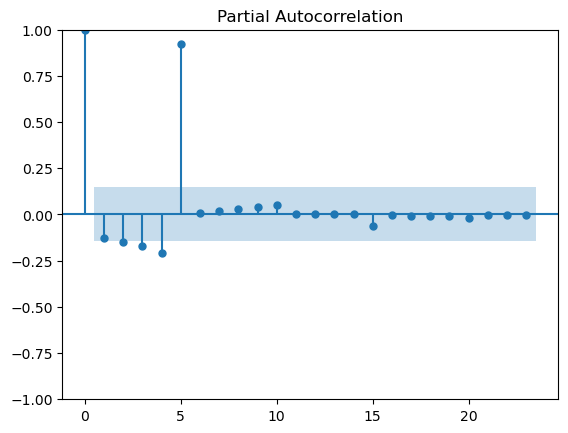

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(sales.Total)
plot_pacf(sales.Total); # add `;` to suppress pacf from plotting twice 